In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
'''!pip install split_folders
import splitfolders

folderlist =['0 hp_352','1 hp_352','2 hp_352', '3 hp_352']

for item in folderlist:

  input_folder = "/content/gdrive/MyDrive/SDP Dataset 12k/Motor/" + item
 
  output ="/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/" + item
  
  splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

SyntaxError: ignored

In [ ]:
'''!pip install split_folders
import splitfolders


input_folder = "/content/gdrive/MyDrive/SDP Dataset/A/A_352"
 
output ="/content/gdrive/MyDrive/SDP Dataset/Split Dataset/A_Split_352"
  
splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

SyntaxError: ignored

In [ ]:
train_dir = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/train'
val_dir   = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/val'
test_dir_1 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/3 hp_352/test'
test_dir_2 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/0 hp_352/train'
test_dir_3 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/1 hp_352/train'
test_dir_4 = '/content/gdrive/MyDrive/SDP Dataset 12k/Motor Split/2 hp_352/train'


In [ ]:
import os
train_NF_fnames = os.listdir(train_dir+'/NF' )
train_BF_fnames = os.listdir(train_dir+'/BF')
train_OF_fnames = os.listdir(train_dir+'/OF')
train_IF_fnames = os.listdir(train_dir+'/IF')

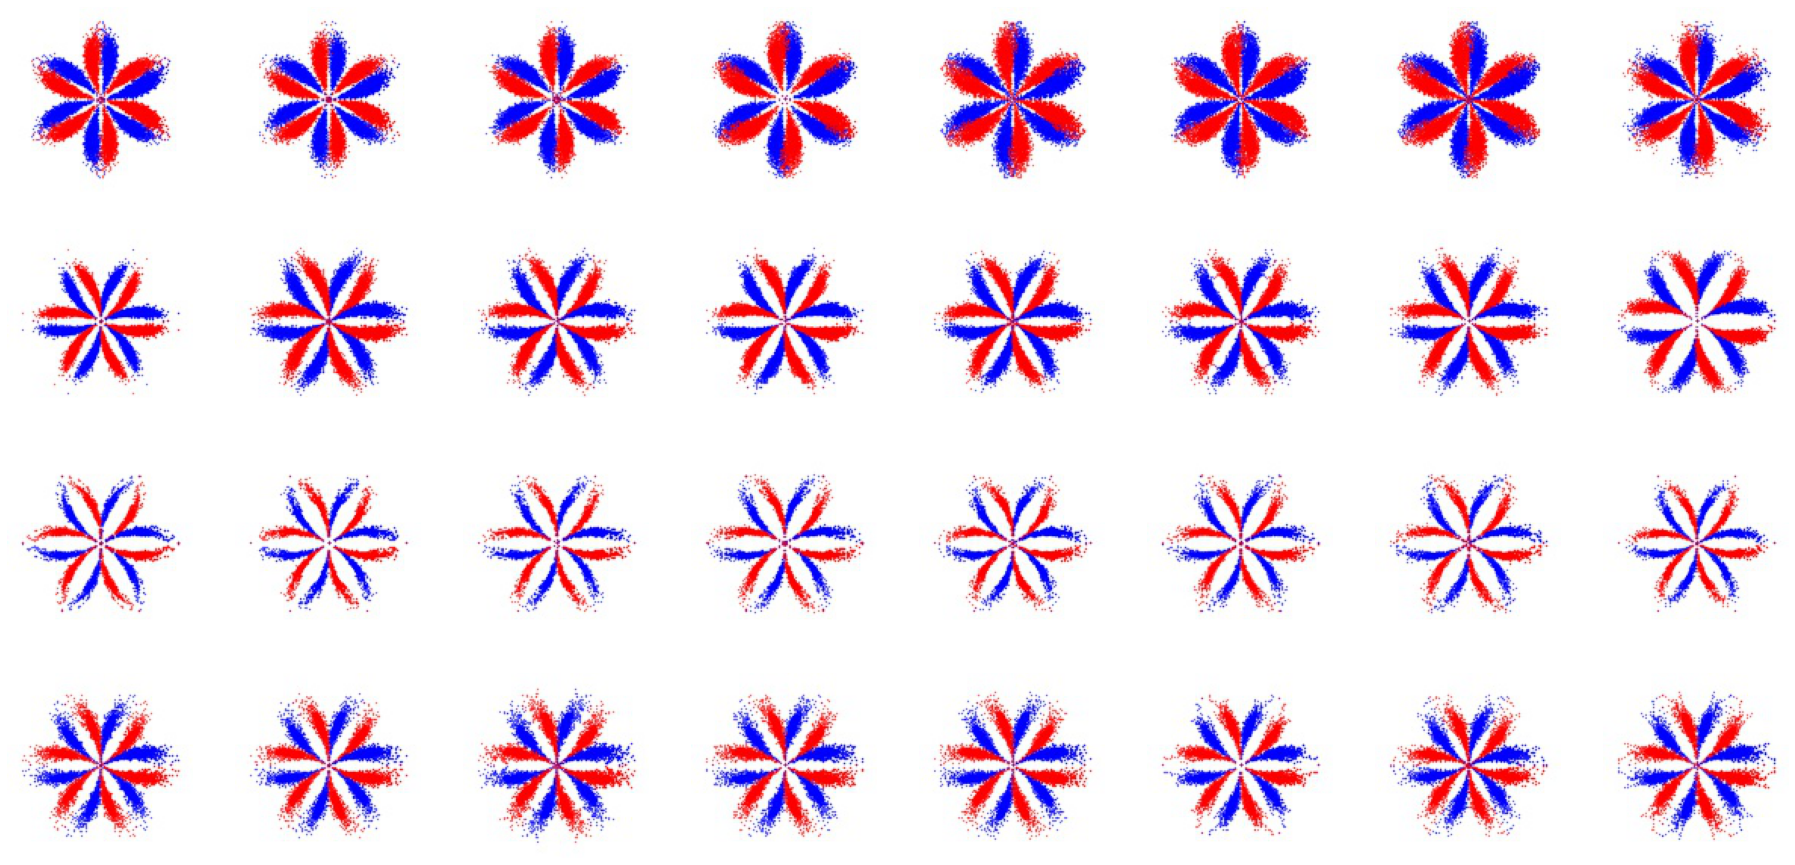

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 8
ncols = 8

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_NF_pix = [os.path.join(train_dir+'/NF', fname) 
                for fname in train_NF_fnames[pic_index-8:pic_index]]
next_BF_pix = [os.path.join(train_dir+'/BF', fname) 
                for fname in train_BF_fnames[pic_index-8:pic_index]]
next_OF_pix = [os.path.join(train_dir+'/OF', fname) 
                for fname in train_OF_fnames[pic_index-8:pic_index]]
next_IF_pix = [os.path.join(train_dir+'/IF', fname) 
                for fname in train_IF_fnames[pic_index-8:pic_index]]                


for i, img_path in enumerate(next_NF_pix+next_BF_pix+next_OF_pix+next_IF_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size=(123,123)
batch_size = 32

In [ ]:
'''def crop(image):
    img_height, img_width = image.shape[0], image.shape[1]
    cropped_image=image[:,72: img_width -72 , :]
    return cropped_image


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
       
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    vertical_flip=False)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=False,
    seed=42,
    class_mode='categorical')

Found 1747 images belonging to 4 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 216 images belonging to 4 classes.


In [ ]:
test_datagen_1 = ImageDataGenerator(rescale=1./255 )

test_generator_1 = test_datagen_1.flow_from_directory(
    test_dir_1,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 222 images belonging to 4 classes.


In [ ]:
test_datagen_2 = ImageDataGenerator(rescale=1./255 )

test_generator_2 = test_datagen_2.flow_from_directory(
    test_dir_2,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 1747 images belonging to 4 classes.


In [ ]:
test_datagen_3 = ImageDataGenerator(rescale=1./255 )

test_generator_3 = test_datagen_3.flow_from_directory(
    test_dir_3,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 1745 images belonging to 4 classes.


In [ ]:
test_datagen_4 = ImageDataGenerator(rescale=1./255 )

test_generator_4 = test_datagen_4.flow_from_directory(
    test_dir_4,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode='categorical')

Found 1744 images belonging to 4 classes.


In [ ]:
num_classes = 4
input_shape = (123,123,3)
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

from random import choice
from random import uniform
from numpy.random import randint
from keras import models
import tensorflow as tf

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator_1.n//test_generator_1.batch_size

le net

In [ ]:
#lenet

def lenet_model( f1, f2, f3, f4, f5, k1, k2, k3,  d1, d2, op, ep):
  model = models.Sequential()
  model.add(layers.Conv2D(filters = f1, kernel_size = (k1, k1), use_bias = True, activation = 'relu', input_shape = input_shape))
  model.add(layers.AveragePooling2D(2,2))
  model.add(layers.Conv2D(filters = f2, kernel_size = (k2, k2), use_bias = True, activation = 'relu'))
  model.add(layers.AveragePooling2D(2,2))
  model.add(layers.Conv2D(filters = f3, kernel_size = (k3, k3), use_bias = True, activation = 'relu'))
  model.add(layers.AveragePooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(units = f4, activation = 'relu'))
  model.add(layers.Dropout(rate = d1))
  model.add(layers.Dense(units = f5, activation = 'relu'))
  model.add(layers.Dropout(rate = d2))
  model.add(layers.Dense(4, activation= "softmax"))

  model.compile(loss = "categorical_crossentropy", optimizer = op, metrics = ["accuracy"])
  es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=12,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
  model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=ep,callbacks = [es], verbose = 0)
  
  return model


NameError: ignored

In [ ]:
#lenet

f1_list = [16, 32, 64]
f2_list = [32, 64, 128]
f3_list = [32, 64 , 128]
f4_list = [64, 96, 128, 256]
f5_list = [64, 96, 128, 256]
k1_list = [1,3,5,7]
k2_list = [1,3,5,7]
k3_list = [1,3,5,7]
d1_list = [0.1,0.2,0.3]
d2_list = [0.1,0.2,0.3]
op_list = ["adam"]



mutation_record = {'f1': f1_list, 'f2': f2_list, 'f3': f3_list, 'f4': f4_list, 'f5': f5_list, 'k1': k1_list, 'k2': k2_list, 'k3': k3_list, 'd1': d1_list, 'd2': d2_list, 'op':op_list}

In [ ]:
def initialization():  
  parameters = {}
  f1 = choice(f1_list)
  parameters["f1"] = f1
  f2 = choice(f2_list)
  parameters["f2"] = f2
  f3 = choice(f3_list)
  parameters["f3"] = f3
  f4 = choice(f4_list)
  parameters["f4"] = f4
  f5 = choice(f5_list)
  parameters["f5"] = f5
  k1 = choice(k1_list)
  parameters["k1"] = k1
  k2 = choice(k2_list)
  parameters["k2"] = k2
  k3 = choice(k3_list)
  parameters["k3"] = k3
  d1 = choice(d1_list)
  parameters["d1"] = d1
  d2 = choice(d2_list)
  parameters["d2"] = d2
  op = choice(op_list)
  parameters["op"] = op
  ep = 200
  parameters["ep"] = ep

  return parameters

In [ ]:
def generate_population(n):
  population = []
  for i in range(n):
    chromosome = initialization()
    population.append(chromosome)
  return population

In [ ]:
# Fitness evaluation metric: Classification Accuracy 
def fitness_evaluation(model):
  metrics1 = model.evaluate(test_generator_1)
  metrics2 = model.evaluate(test_generator_2)
  metrics3 = model.evaluate(test_generator_3)
  metrics4 = model.evaluate(test_generator_4)

  metrics = ((metrics1[1]*2) + metrics2[1] + metrics3[1] + metrics4[1])/5
  return metrics

In [ ]:
# Roulette wheel selection method
def selection(population_fitness):
  total = sum(population_fitness)
  percentage = [round((x/total) * 100) for x in population_fitness]
  selection_wheel = []
  for pop_index,num in enumerate(percentage):
    selection_wheel.extend([pop_index]*num)
  parent1_ind = choice(selection_wheel)
  parent2_ind = choice(selection_wheel)
  return [parent1_ind, parent2_ind]

In [ ]:
def crossover(parent1, parent2, parent3):
  child1 = {}
  child2 = {}
  child3 = {}
  child4 = {}

  #tertiary reproduction (orgy)

  child1["f1"] = choice([parent1["f1"], parent2["f1"], parent3["f1"]])
  child1["f2"] = choice([parent1["f2"], parent2["f2"], parent3["f2"]])
  child1["f3"] = choice([parent1["f3"], parent2["f3"], parent3["f3"]])
  child1["f4"] = choice([parent1["f4"], parent2["f4"], parent3["f4"]])
  child1["f5"] = choice([parent1["f5"], parent2["f5"], parent3["f5"]])

  child2["f1"] = choice([parent1["f1"], parent2["f1"], parent3["f1"]])
  child2["f2"] = choice([parent1["f2"], parent2["f2"], parent3["f2"]])
  child2["f3"] = choice([parent1["f3"], parent2["f3"], parent3["f3"]])
  child2["f4"] = choice([parent1["f4"], parent2["f4"], parent3["f4"]])
  child2["f5"] = choice([parent1["f5"], parent2["f5"], parent3["f5"]])

  child1["k1"] = choice([parent1["k1"], parent2["k1"], parent3["k1"]])
  child2["k1"] = choice([parent1["k1"], parent2["k1"], parent3["k1"]])

  child1["k2"] = choice([parent1["k2"], parent2["k2"], parent3["k2"]])
  child2["k2"] = choice([parent1["k2"], parent2["k2"], parent3["k2"]])

  child1["k3"] = choice([parent1["k3"], parent2["k3"], parent3["k3"]])
  child2["k3"] = choice([parent1["k3"], parent2["k3"], parent3["k3"]])

  child1["d1"] = choice([parent1["d1"], parent2["d1"], parent3["d1"]])
  child2["d1"] = choice([parent1["d1"], parent2["d1"], parent3["d1"]])

  child1["d2"] = choice([parent1["d2"], parent2["d2"], parent3["d2"]])
  child2["d2"] = choice([parent1["d2"], parent2["d2"], parent3["d2"]])

  child1["op"] = choice([parent1["op"], parent2["op"], parent3["op"]])
  child2["op"] = choice([parent1["op"], parent2["op"], parent3["op"]])

  child1["ep"] = choice([parent1["ep"], parent2["ep"], parent3["ep"]])
  child2["ep"] = choice([parent1["ep"], parent2["ep"], parent3["ep"]])


  #binary reproduction

  child3["f1"] = choice([parent1["f1"], parent2["f1"]])
  child3["f2"] = choice([parent1["f2"], parent2["f2"]])
  child3["f3"] = choice([parent1["f3"], parent2["f3"]])
  child3["f4"] = choice([parent1["f4"], parent2["f4"]])
  child3["f5"] = choice([parent1["f5"], parent2["f5"]])

  child4["f1"] = choice([parent1["f1"], parent2["f1"]])
  child4["f2"] = choice([parent1["f2"], parent2["f2"]])
  child4["f3"] = choice([parent1["f3"], parent2["f3"]])
  child4["f4"] = choice([parent1["f4"], parent2["f4"]])
  child4["f5"] = choice([parent1["f5"], parent2["f5"]])

  child3["k1"] = choice([parent1["k1"], parent2["k1"]])
  child4["k1"] = choice([parent1["k1"], parent2["k1"]])

  child3["k2"] = choice([parent1["k2"], parent2["k2"]])
  child4["k2"] = choice([parent1["k2"], parent2["k2"]])

  child3["k3"] = choice([parent1["k3"], parent2["k3"]])
  child4["k3"] = choice([parent1["k3"], parent2["k3"]])

  child3["d1"] = choice([parent1["d1"], parent2["d1"]])
  child4["d1"] = choice([parent1["d1"], parent2["d1"]])

  child3["d2"] = choice([parent1["d2"], parent2["d2"]])
  child4["d2"] = choice([parent1["d2"], parent2["d2"]])

  child3["op"] = choice([parent1["op"], parent2["op"]])
  child4["op"] = choice([parent1["op"], parent2["op"]])

  child3["ep"] = choice([parent1["ep"], parent2["ep"]])
  child4["ep"] = choice([parent1["ep"], parent2["ep"]])


  return [child1 , child2 , child3 , child4]

In [ ]:
def mutation(chromosome):
  a = choice(list(mutation_record.items()))
  chromosome[a[0]] = choice(a[1])
  b = choice(list(mutation_record.items()))
  chromosome[b[0]] = choice(b[1])
  return chromosome

In [ ]:
generations = 6
threshold = 1
num_pop = 14

population = generate_population(num_pop)

model_list = []


for generation in range(generations):

  population_fitness = []
  for chromosome in population:
    f1 = chromosome["f1"]
    f2 = chromosome["f2"]
    f3 = chromosome["f3"]
    f4 = chromosome["f4"]
    f5 = chromosome["f5"]
    k1 = chromosome["k1"]
    k2 = chromosome["k2"]
    k3 = chromosome["k3"]
    d1 = chromosome["d1"]
    d2 = chromosome["d2"]
    op = chromosome["op"]
    ep = chromosome["ep"]

    try:
      model = lenet_model(f1, f2, f3, f4, f5, k1, k2, k3, d1, d2, op, ep)
      acc = fitness_evaluation(model)
      print("Parameters: ", chromosome)
      print("Weighted Accuracy: ", round(acc,3))
      model_list.append((chromosome,acc))
        
      
    except:
      acc=0
      print("Parameters: ", chromosome)
      print("Invalid parameters - Build fail")

    population_fitness.append(acc)

  # Evaluation of Fitness (trail by fire) and selection of parents

  first_max = max(population_fitness)
  first_max_ind = population_fitness.index(first_max)
  alpha = population[(first_max_ind)]
    
  parents_ind = selection(population_fitness)
  parent1 = population[parents_ind[0]]
  parent2 = population[parents_ind[1]]
  
  #creation of offsprings

  children = crossover(parent1, parent2, alpha)
  child1 = children[0]
  child2 = children[1]
  child3 = children[2]
  child4 = children[3]

  


  #Mass Mutations

  for individual in population:
    mutated = mutation(individual)
    population.remove(individual)
    population.append(mutated)

  
  #Additions of elite to the population

  population.append(alpha)
  
  population.append(parent1)
  population.append(parent2)

  population.append(child1)
  population.append(child2)
  population.append(child3)
  population.append(child4)

  print("Generation ", generation+1," Outcome: ")
  if max(population_fitness) >= threshold:
    print("Obtained desired accuracy: ", max(population_fitness))
    break
  else:
    print("Maximum accuracy in generation {} : {}".format(generation+1, max(population_fitness)))

  #killing the weaklings (so the strong may take their place)

  first_min = min(population_fitness)
  first_min_ind = population_fitness.index(first_min)
  population.remove(population[first_min_ind])

  second_min = min(population_fitness)
  second_min_ind = population_fitness.index(second_min)
  population.remove(population[second_min_ind])

  third_min = min(population_fitness)
  third_min_ind = population_fitness.index(third_min)
  population.remove(population[third_min_ind])

  fourth_min = min(population_fitness)
  fourth_min_ind = population_fitness.index(fourth_min)
  population.remove(population[fourth_min_ind])

  fifth_min = min(population_fitness)
  fifth_min_ind = population_fitness.index(fifth_min)
  population.remove(population[fifth_min_ind])

  sixth_min = min(population_fitness)
  sixth_min_ind = population_fitness.index(sixth_min)
  population.remove(population[sixth_min_ind])

  seventh_min = min(population_fitness)
  seventh_min_ind = population_fitness.index(seventh_min)
  population.remove(population[seventh_min_ind])


55/55 [==============================] - 1143s 21s/step - loss: 1.3856 - accuracy: 0.2775
Parameters:  {'f1': 32, 'f2': 32, 'f3': 64, 'f4': 256, 'f5': 96, 'k1': 5, 'k2': 5, 'k3': 7, 'd1': 0.3, 'd2': 0.3, 'op': 'adam', 'ep': 200}
Weighted Accuracy:  0.278
55/55 [==============================] - 3s 54ms/step - loss: 0.4616 - accuracy: 0.9117
Parameters:  {'f1': 64, 'f2': 32, 'f3': 64, 'f4': 256, 'f5': 64, 'k1': 1, 'k2': 5, 'k3': 5, 'd1': 0.2, 'd2': 0.3, 'op': 'adam', 'ep': 200}
Weighted Accuracy:  0.899
55/55 [==============================] - 3s 54ms/step - loss: 0.4680 - accuracy: 0.8050
Parameters:  {'f1': 32, 'f2': 64, 'f3': 128, 'f4': 64, 'f5': 64, 'k1': 1, 'k2': 5, 'k3': 3, 'd1': 0.3, 'd2': 0.1, 'op': 'adam', 'ep': 200}
Weighted Accuracy:  0.791
Parameters:  {'f1': 32, 'f2': 128, 'f3': 32, 'f4': 256, 'f5': 128, 'k1': 0.5, 'k2': 7, 'k3': 1, 'd1': 0.3, 'd2': 0.1, 'op': 'adam', 'ep': 200}
Invalid parameters - Build fail
55/55 [==============================] - 3s 55ms/step - loss: 0.

In [ ]:
print(model_list)

[]


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

In [ ]:
'''from keras import models
import tensorflow as tf


def CNN_model( f1, f2, f3, k1, k2, k3, k4, a1, a2, d1, d2, op, ep):
  model = models.Sequential()
  model.add(layers.Conv2D(filters = f1, kernel_size = (k1, k1), activation = a1, input_shape = input_shape))
  model.add(layers.Conv2D(filters = f1, kernel_size = (k2, k2), activation = a1))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(filters = f2, kernel_size = (k3, k3), activation = a1))
  model.add(layers.Conv2D(filters = f2, kernel_size = (k4, k4), activation = a1))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dropout(rate = d1))
  model.add(layers.Dense(units = f3, activation = a2))
  model.add(layers.Dropout(rate = d2))
  model.add(layers.Dense(4, activation= "softmax"))

  model.compile(loss = "categorical_crossentropy", optimizer = op, metrics = ["accuracy"])
  es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
  model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, epochs=ep,callbacks = [es])
  
  return model

In [ ]:
'''f1_list = [16, 32, 64]
f2_list = [32, 64, 128]
f3_list = [64, 128, 256, 512]
k1_list = [1,3,5]
k2_list = [1,3,5]
k3_list = [1,3,5]
k4_list = [1,3,5]
a1_list = ["relu"]
a2_list = ["relu"]




mutation_record = {'f1': f1_list, 'f2': f2_list, 'f3': f3_list, 'k1': k1_list, 'k2': k2_list, 'k3': k3_list, 'k4': k4_list, 'a1': a1_list, 'a2': a2_list }

In [ ]:
'''def initialization():  
  parameters = {}
  f1 = choice(f1_list)
  parameters["f1"] = f1
  f2 = choice(f2_list)
  parameters["f2"] = f2
  f3 = choice(f3_list)
  parameters["f3"] = f3
  k1 = choice(k1_list)
  parameters["k1"] = k1
  k2 = choice(k2_list)
  parameters["k2"] = k2
  k3 = choice(k3_list)
  parameters["k3"] = k3
  k4 = choice(k4_list)
  parameters["k4"] = k4
  a1 = choice(a1_list)
  parameters["a1"] = a1
  a2 = choice(a2_list)
  parameters["a2"] = a2
  d1 = round(uniform(0.1, 0.5), 1)
  parameters["d1"] = d1
  d2 = round(uniform(0.1, 0.5), 1)
  parameters["d2"] = d2
  op = choice(["adamax", "adadelta", "adam", "adagrad"])
  parameters["op"] = op
  ep = randint(50, 100)
  parameters["ep"] = ep

  return parameters

In [ ]:
'''def generate_population(n):
  population = []
  for i in range(n):
    chromosome = initialization()
    population.append(chromosome)
  return population

In [ ]:
'''# Fitness evaluation metric: Classification Accuracy 
def fitness_evaluation(model):
  metrics1 = model.evaluate(test_generator_1)
  metrics2 = model.evaluate(test_generator_2)
  metrics3 = model.evaluate(test_generator_3)
  metrics4 = model.evaluate(test_generator_4)

  metrics = ((metrics1[1]*2) + metrics2[1] + metrics3[1] + metrics4[1])/5
  return metrics

In [ ]:
'''# Roulette wheel selection method
def selection(population_fitness):
  total = sum(population_fitness)
  percentage = [round((x/total) * 100) for x in population_fitness]
  selection_wheel = []
  for pop_index,num in enumerate(percentage):
    selection_wheel.extend([pop_index]*num)
  parent1_ind = choice(selection_wheel)
  parent2_ind = choice(selection_wheel)
  return [parent1_ind, parent2_ind]

In [ ]:
def crossover(parent1, parent2, parent3):
  child1 = {}
  child2 = {}
  child3 = {}
  child4 = {}

  #tertiary reproduction (orgy)

  child1["f1"] = choice([parent1["f1"], parent2["f1"], parent3["f1"]])
  child1["f2"] = choice([parent1["f2"], parent2["f2"], parent3["f2"]])
  child1["f3"] = choice([parent1["f3"], parent2["f3"], parent3["f3"]])

  child2["f1"] = choice([parent1["f1"], parent2["f1"], parent3["f1"]])
  child2["f2"] = choice([parent1["f2"], parent2["f2"], parent3["f2"]])
  child2["f3"] = choice([parent1["f3"], parent2["f3"], parent3["f3"]])

  child1["k1"] = choice([parent1["k1"], parent2["k1"], parent3["k1"]])
  child2["k1"] = choice([parent1["k1"], parent2["k1"], parent3["k1"]])

  child1["k2"] = choice([parent1["k2"], parent2["k2"], parent3["k2"]])
  child2["k2"] = choice([parent1["k2"], parent2["k2"], parent3["k2"]])

  child1["k3"] = choice([parent1["k3"], parent2["k3"], parent3["k3"]])
  child2["k3"] = choice([parent1["k3"], parent2["k3"], parent3["k3"]])

  child1["k4"] = choice([parent1["k4"], parent2["k4"], parent3["k4"]])
  child2["k4"] = choice([parent1["k4"], parent2["k4"], parent3["k4"]])

  child1["a1"] = choice([parent1["a1"], parent2["a1"], parent3["a1"]])
  child2["a1"] = choice([parent1["a1"], parent2["a1"], parent3["a1"]])

  child1["a2"] = choice([parent1["a2"], parent2["a2"], parent3["a2"]])
  child2["a2"] = choice([parent1["a2"], parent2["a2"], parent3["a2"]])

  child1["d1"] = choice([parent1["d1"], parent2["d1"], parent3["d1"]])
  child2["d1"] = choice([parent1["d1"], parent2["d1"], parent3["d1"]])

  child1["d2"] = choice([parent1["d2"], parent2["d2"], parent3["d2"]])
  child2["d2"] = choice([parent1["d2"], parent2["d2"], parent3["d2"]])

  child1["op"] = choice([parent1["op"], parent2["op"], parent3["op"]])
  child2["op"] = choice([parent1["op"], parent2["op"], parent3["op"]])

  child1["ep"] = choice([parent1["ep"], parent2["ep"], parent3["ep"]])
  child2["ep"] = choice([parent1["ep"], parent2["ep"], parent3["ep"]])


  #binary reproduction

  child3["f1"] = choice([parent1["f1"], parent2["f1"]])
  child3["f2"] = choice([parent1["f2"], parent2["f2"]])
  child3["f3"] = choice([parent1["f3"], parent2["f3"]])

  child4["f1"] = choice([parent1["f1"], parent2["f1"]])
  child4["f2"] = choice([parent1["f2"], parent2["f2"]])
  child4["f3"] = choice([parent1["f3"], parent2["f3"]])

  child3["k1"] = choice([parent1["k1"], parent2["k1"]])
  child4["k1"] = choice([parent1["k1"], parent2["k1"]])

  child3["k2"] = choice([parent1["k2"], parent2["k2"]])
  child4["k2"] = choice([parent1["k2"], parent2["k2"]])

  child3["k3"] = choice([parent1["k3"], parent2["k3"]])
  child4["k3"] = choice([parent1["k3"], parent2["k3"]])

  child3["k4"] = choice([parent1["k4"], parent2["k4"]])
  child4["k4"] = choice([parent1["k4"], parent2["k4"]])

  child3["a1"] = choice([parent1["a1"], parent2["a1"]])
  child4["a1"] = choice([parent1["a1"], parent2["a1"]])

  child3["a2"] = choice([parent1["a2"], parent2["a2"]])
  child4["a2"] = choice([parent1["a2"], parent2["a2"]])

  child3["d1"] = choice([parent1["d1"], parent2["d1"]])
  child4["d1"] = choice([parent1["d1"], parent2["d1"]])

  child3["d2"] = choice([parent1["d2"], parent2["d2"]])
  child4["d2"] = choice([parent1["d2"], parent2["d2"]])

  child3["op"] = choice([parent1["op"], parent2["op"]])
  child4["op"] = choice([parent1["op"], parent2["op"]])

  child3["ep"] = choice([parent1["ep"], parent2["ep"]])
  child4["ep"] = choice([parent1["ep"], parent2["ep"]])


  return [child1 , child2 , child3 , child4]

In [ ]:
def mutation(chromosome):
  a = choice(list(mutation_record.items()))
  chromosome[a[0]] = choice(a[1])
  return chromosome


In [ ]:
generations = 10
threshold = 1
num_pop = 20

population = generate_population(num_pop)

model_list = []
list1=[("",""),("",0)]

for generation in range(generations):

  population_fitness = []
  for chromosome in population:
    f1 = chromosome["f1"]
    f2 = chromosome["f2"]
    f3 = chromosome["f3"]
    k1 = chromosome["k1"]
    k2 = chromosome["k2"]
    k3 = chromosome["k3"]
    k4 = chromosome["k4"]
    a1 = chromosome["a1"]
    a2 = chromosome["a2"]
    d1 = chromosome["d1"]
    d2 = chromosome["d2"]
    op = chromosome["op"]
    ep = chromosome["ep"]

    try:
      model = CNN_model(f1, f2, f3, k1, k2, k3, k4, a1, a2, d1, d2, op, ep)
      acc = fitness_evaluation(model)
      print("Parameters: ", chromosome)
      print("Weighted Accuracy: ", round(acc,3))
      if acc > list1[1][1]:
        list1[0]= ("Parameters: ", chromosome)
        list1[1]= ("Weighted Accuracy: ", round(acc,3))
        
      
    except:
      acc=0
      print("Parameters: ", chromosome)
      print("Invalid parameters - Build fail")

    population_fitness.append(acc)

  # Evaluation of Fitness (trail by fire) and selection of parents

  first_max = max(population_fitness)
  first_max_ind = population_fitness.index(first_max)
  alpha = population[(first_max_ind)]
    
  parents_ind = selection(population_fitness)
  parent1 = population[parents_ind[0]]
  parent2 = population[parents_ind[1]]
  
  #creation of offsprings

  children = crossover(parent1, parent2, alpha)
  child1 = children[0]
  child2 = children[1]
  child3 = children[2]
  child4 = children[3]

  #killing the weaklings (so the strong may take their place)

  first_min = min(population_fitness)
  first_min_ind = population_fitness.index(first_min)
  population.remove(population[first_min_ind])

  second_min = min(population_fitness)
  second_min_ind = population_fitness.index(second_min)
  population.remove(population[second_min_ind])

  third_min = min(population_fitness)
  third_min_ind = population_fitness.index(third_min)
  population.remove(population[third_min_ind])

  fourth_min = min(population_fitness)
  fourth_min_ind = population_fitness.index(fourth_min)
  population.remove(population[fourth_min_ind])

  fifth_min = min(population_fitness)
  fifth_min_ind = population_fitness.index(fifth_min)
  population.remove(population[fifth_min_ind])

  sixth_min = min(population_fitness)
  sixth_min_ind = population_fitness.index(sixth_min)
  population.remove(population[sixth_min_ind])

  seventh_min = min(population_fitness)
  seventh_min_ind = population_fitness.index(seventh_min)
  population.remove(population[seventh_min_ind])

  #Mass Mutations

  for individual in population:
    mutated = mutation(individual)
    population.remove(individual)
    population.append(mutated)

  
  #Additions of elite to the population

  population.append(alpha)
  
  population.append(parent1)
  population.append(parent2)

  population.append(child1)
  population.append(child2)
  population.append(child3)
  population.append(child4)

  print("Generation ", generation+1," Outcome: ")
  if max(population_fitness) >= threshold:
    print("Obtained desired accuracy: ", max(population_fitness))
    break
  else:
    print("Maximum accuracy in generation {} : {}".format(generation+1, max(population_fitness)))







In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), metrics= ['accuracy']) #metrics=[metrics.AUC(from_logits=True) #tf.keras.optimizers.Adam(lr)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 1000

In [ ]:
## set Checkpoint : save best only, verbose on
#checkpoint = callbacks.ModelCheckpoint("railtrack_enetB7.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_freq=1)

In [ ]:
# history = model.fit(train_data, train_labels, epochs = 45, batch_size = 128, verbose = 0)
import keras
history = demo_model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, validation_data=val_generator, validation_steps=STEP_SIZE_VAL, callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])

In [ ]:
#models.save_model(model, '/content/gdrive/MyDrive/Minor Project trained models/cumulative-3-1.h5')
#model.load_weights("model name here")

Text(69.0, 0.5, 'Actual')

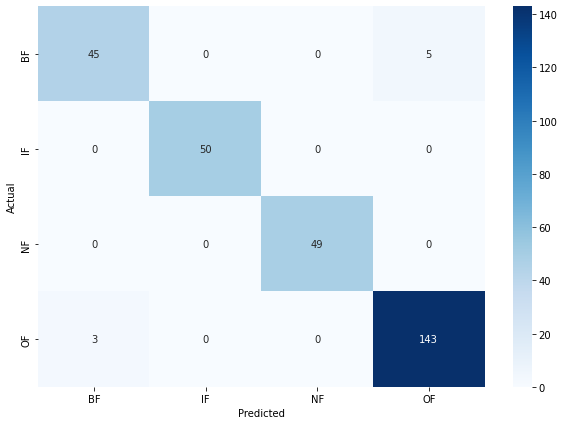

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels = test_generator.class_indices
predY=model.predict(test_generator) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
df_cm = pd.DataFrame(cm, labels,labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues,fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

# plt.show()
# print(cm)

In [ ]:
prediction = model.predict(test_data)
prediction_labels = list([])
for each_prediction in prediction:
    prediction_labels.append(list(each_prediction).index(max(each_prediction)))
from sklearn.metrics import confusion_matrix
true_labels = test_generator.classes
matrix = confusion_matrix(true_labels, prediction_labels)
import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()

sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
plt.xticks(rotation = 90)
plt.show()

In [ ]:

print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

          BF       0.94      0.90      0.92        50
          IF       1.00      1.00      1.00        50
          NF       1.00      1.00      1.00        49
          OF       0.97      0.98      0.97       146

    accuracy                           0.97       295
   macro avg       0.98      0.97      0.97       295
weighted avg       0.97      0.97      0.97       295



In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,val): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[val])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

NameError: ignored

In [ ]:
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = model.predict(im)

        # Compare true and predicted labels 
        if np.array_equal(predicted_label, true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

In [ ]:
test_generator[0][1]



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
MISCLASSIFIED = get_misclassified_images(test_generator)

KeyboardInterrupt: ignored

In [ ]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as5
num = 0
test_mis_im = MISCLASSIFIED[num][0]

fig = plt.figure(figsize=(16,16))
plt.title("Misclassified images")
for index in range(len(MISCLASSIFIED)):
    ax = fig.add_subplot(4, 4, index + 1, xticks=[], yticks=[])
    image = MISCLASSIFIED[index][0]
    label_true = MISCLASSIFIED[index][1]
    label_guess = MISCLASSIFIED[index][2]
    bright = avg_brightness(image)
    ax.imshow(image)
    ax.set_title("{} {:0.0f} {}".format(label_true, bright, label_guess))
    
    if index==15:
        break